### <center> Homework 1 </center> <br>
#### <center> Network Dynamics & Learning Course </center> <br>
#### <center> November 2024 </center> <br>

-------

Author: Silva Bashllari - s299317
Author: Gioele Giachino - s295380

#### 0. Setup and import Libraries

In [4]:
import numpy as np
import scipy as scipy
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import cvxpy as cp

### <center> Problem 1 </center>

   <span style="color: red;"> Consider the network in Graph 1 (see below) with link capacities: <br> </span>
   
- c1 = c3 = c5 = 3
- c2 =c4 = 2
- c6 = c7 = 1


In [261]:
options = {
    'node_color': 'black',
    'node_size': 250,
    'width': 1, # width of the edges
    'with_labels': True,
    'font_color':'pink',
    'alpha': 0.9,
}

In [262]:
graph1 = nx.DiGraph()

In [263]:
edges_list_g1 = [('o', 'a',3), ('a','d',2), ('o', 'b',3),('b', 'd',2),('a','b',1), ('b','c',3),('c','d',1)]

In [264]:
for u,v,capacity in edges_list_g1:
    graph1.add_edge(u,v, capacity=capacity)

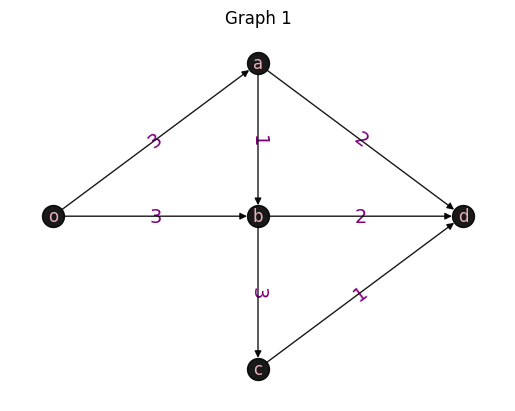

In [265]:
pos = {'o':[0,0], 'a':[1,1], 'b':[1,0], 'c':[1,-1], 'd':[2,0]}
plt.title("Graph 1")
nx.draw_networkx_edge_labels(graph1,pos,edge_labels={('o', 'a'):'3',
('o', 'b'):'3',('a','d'):'2',('b', 'd'):'2',
('b','c'):'3',('a','b'):'1', ('c','d'): '1'},font_color='purple', font_size=14)

nx.draw(graph1, pos, **options)


  <span style="color: red;"> (a) Compute the capacity of all the cuts and find the minimum capacity to be removed for no
 feasible flow  from o to d to exist. </span>

In [266]:
source = 'o'
sink = 'd'

**All the possible cuts:**

 1. $U = \{o,a,b,c\} ;  U^C=\{d\}$ ->  2 edge e2(a,d)+ 2 edge e4 (b,d) + 1 edge e6 (c,d) = 5
 2. $U = \{o,\} ;  U^C=\{a,b,c,d\}$ -> 3 edge e1(o,a) +3 edge e3 (o,b)  = 6
 3. $U = \{o,a\} ;  U^C=\{b,c,d\}$ ->  2 edge e2(a,d) +1 edge e7 (a,b) + 3 edge e3 (o,b)  = 6
 4. $U = \{o,b\} ;  U^C=\{a,c, d\}$ -> 3 edge e1(o,a) +2 edge e4(b,d) + 3 edge e5 (b,c) = 8
 5. $U = \{o,c\} ;  U^C=\{a,b, d\}$ -> 3 edge e1(o,a) +3 edge e3(o,b) +1 edge e6 (c,d) = 7
 6. $U = \{o,a,b\} ;  U^C=\{c, d\}$ -> 2 edge e2(a,d) +2 edge e4(b,d) + 3 edge e5(b,c) = 7
 7. $U = \{o,a,c\} ;  U^C=\{b, d\}$ -> 2 edge e2(a,d) +1 edge e7(a,b) + 3 edge e3 (o,b) = 6
 8. $U = \{o,b,c\} ;  U^C=\{a, d\}$ -> 3 edge e1(o,a) +2 edge e4(b,d) +1 edge e6(c,d) = 6

In [267]:
nx.algorithms.flow.minimum_cut(graph1, source, sink, capacity="capacity")


(5, ({'a', 'b', 'c', 'o'}, {'d'}))

In [268]:
nx.algorithms.flow.maximum_flow(graph1,'o','d')

(5,
 {'o': {'a': 3, 'b': 2},
  'a': {'d': 2, 'b': 1},
  'd': {},
  'b': {'d': 2, 'c': 1},
  'c': {'d': 1}})

As it can be observed in the output of the function above, our listing of the minimum-cuts is confirmed by the methods of Networkx.

  <span style="color: red;"> (b) You are given x > 0 extra units of capacity ($x \in Z$). How should you distribute them in order to maximize the throughput that can be sent from o to d? Plot the maximum throughput from o to d as a function of  $x \geq0$. </span>

In this network initial max flow (WITHOUT extra capacity) from o to d corresponds to 5
Added capacity to edge (a, d). Total added: 1
Added capacity to edge (a, d). Total added: 2
Added capacity to edge (o, a). Total added: 3
Added capacity to edge (a, d). Total added: 4
Added capacity to edge (o, a). Total added: 5
Added capacity to edge (a, d). Total added: 6
Added capacity to edge (o, a). Total added: 7
Added capacity to edge (a, d). Total added: 8
Added capacity to edge (o, a). Total added: 9
Added capacity to edge (a, d). Total added: 10
Added capacity to edge (o, a). Total added: 11
Added capacity to edge (a, d). Total added: 12
Added capacity to edge (o, a). Total added: 13
Added capacity to edge (a, d). Total added: 14
Added capacity to edge (o, a). Total added: 15
Added capacity to edge (a, d). Total added: 16
Added capacity to edge (o, a). Total added: 17
Added capacity to edge (a, d). Total added: 18
Added capacity to edge (o, a). Total added: 19
Added capacity to edge (a, d)

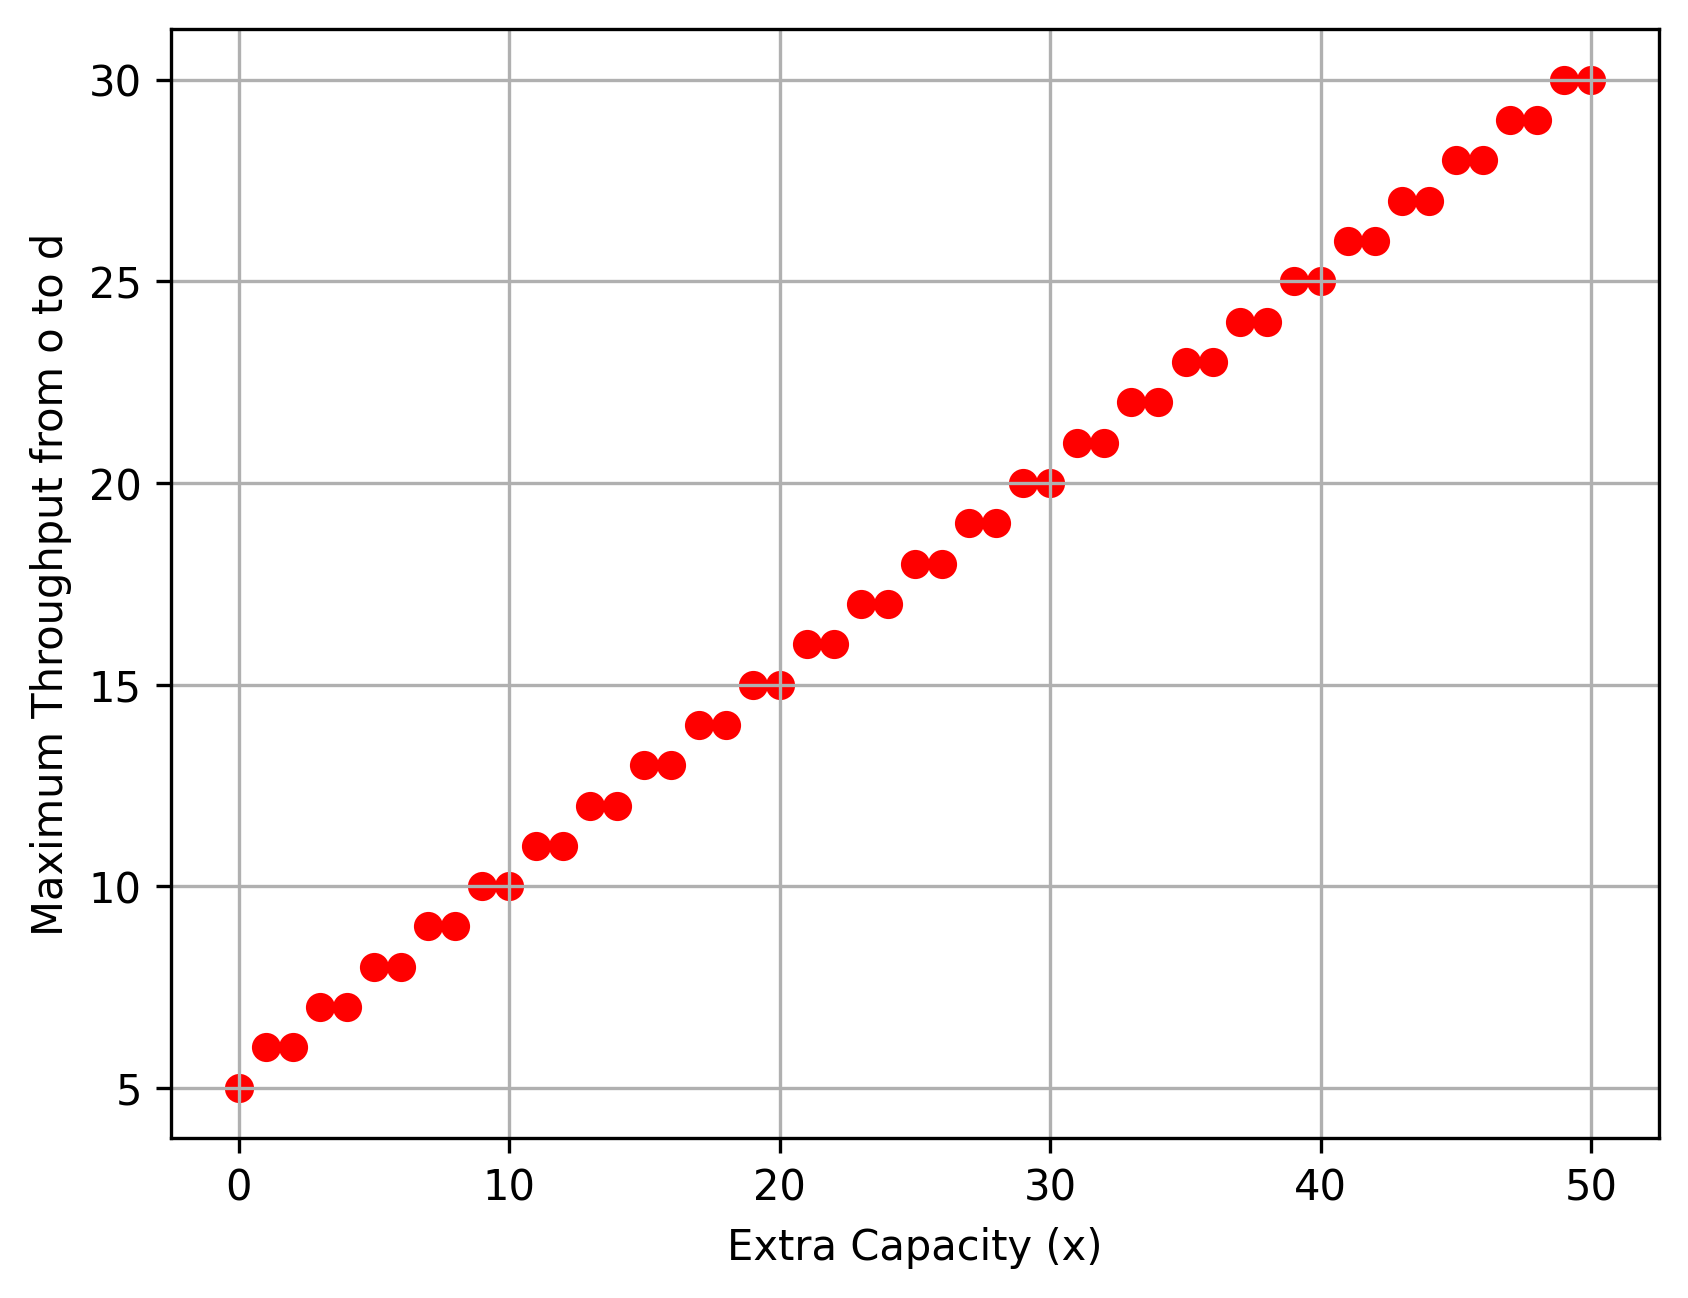

In [269]:
# Function to compute maximum flow
def max_flow(graph):
    return nx.maximum_flow_value(graph, 'o', 'd')

# Computing initial max flow without any extra capacity
initial_max_flow = max_flow(graph1)
print(f"In this network initial max flow (WITHOUT extra capacity) from o to d corresponds to {initial_max_flow}")

def distribute_extra_capacity(graph, extra_capacity):
    graph_copy = graph1.copy()  # Creating a copy of the graph for safety
    total_added_capacity = 0
    throughput_values = [max_flow(graph_copy)]  # Keep track of throughput values

    while total_added_capacity < extra_capacity:
        # Finding edges part of the min-cut
        _, partition = nx.minimum_cut(graph_copy, 'o', 'd')
        cut_1, cut_2 = partition
        min_cut_edges = [(u, v) for u, v in graph_copy.edges() if u in cut_1 and v in cut_2]

        if not min_cut_edges:
            print("No more min-cut edges to increase capacity.")
            break

        # Select one edge (e.g., the first edge) from the min-cut
        u, v = min_cut_edges[0]  # Pick the first edge
        graph_copy[u][v]['capacity'] += 1
        total_added_capacity += 1
        print(f"Added capacity to edge ({u}, {v}). Total added: {total_added_capacity}")

        # Compute and store the new throughput
        throughput_values.append(max_flow(graph_copy))

    return throughput_values

# Compute throughput for adding capacity from 1 to 50 in one go
x_values = range(51)  # Consider adding capacity from 0 to 50
throughput_values = distribute_extra_capacity(graph1, 50)

# Print throughput values
print("Throughput values:", throughput_values)


#print(f' The throughput values are: {throughput_values}')
# Plot the results
plt.figure(dpi=300)
plt.scatter(x_values, throughput_values, marker='o', color='r')
#plt.title('Maximum Throughput as a Function of Extra Capacity')
plt.xlabel('Extra Capacity (x)')
plt.ylabel('Maximum Throughput from o to d')
plt.grid(True)
#plt.savefig("Ex1_b.png")
plt.show()


In this network initial max flow (WITHOUT extra capacity) from o to d corresponds to 5
Added capacity to edge (b, d). Total added: 1
Added capacity to edge (b, d). Total added: 2
Added capacity to edge (a, d). Total added: 3
Added capacity to edge (o, b). Total added: 4
Added capacity to edge (o, b). Total added: 5
Added capacity to edge (b, d). Total added: 6
Added capacity to edge (o, b). Total added: 7
Added capacity to edge (b, d). Total added: 8
Added capacity to edge (o, b). Total added: 9
Added capacity to edge (b, d). Total added: 10
Added capacity to edge (o, b). Total added: 11
Added capacity to edge (b, d). Total added: 12
Added capacity to edge (o, b). Total added: 13
Added capacity to edge (b, d). Total added: 14
Added capacity to edge (o, b). Total added: 15
Added capacity to edge (b, d). Total added: 16
Added capacity to edge (o, b). Total added: 17
Added capacity to edge (b, d). Total added: 18
Added capacity to edge (o, b). Total added: 19
Added capacity to edge (b, d)

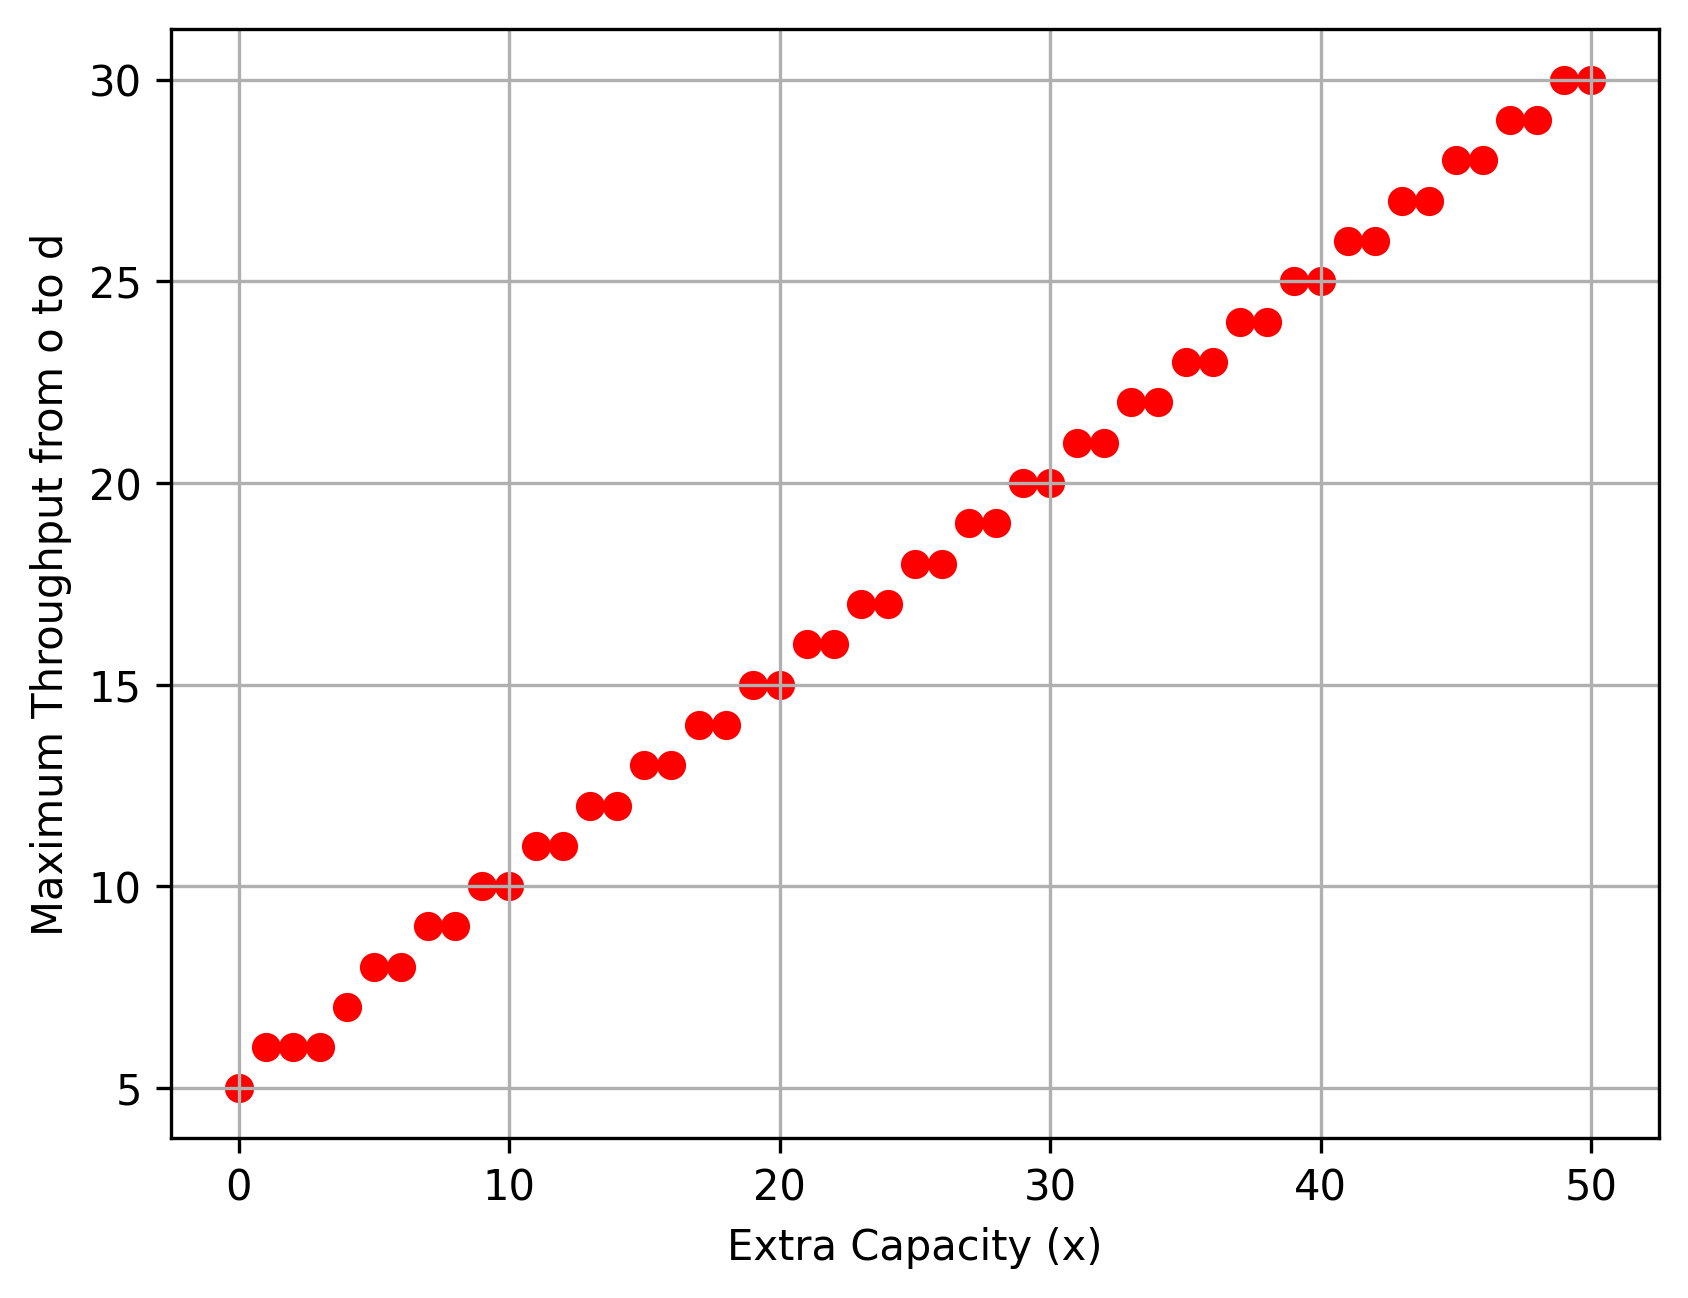

In [270]:
# Function to compute maximum flow
def max_flow(graph):
    return nx.maximum_flow_value(graph, 'o', 'd')

# Computing initial max flow without any extra capacity
initial_max_flow = max_flow(graph1)
print(f"In this network initial max flow (WITHOUT extra capacity) from o to d corresponds to {initial_max_flow}")

def distribute_extra_capacity(graph, extra_capacity):
    graph_copy = graph1.copy()  # Creating a copy of the graph for safety
    total_added_capacity = 0
    throughput_values = [max_flow(graph_copy)]  # Keep track of throughput values

    while total_added_capacity < extra_capacity:
        # Finding edges part of the min-cut
        _, partition = nx.minimum_cut(graph_copy, 'o', 'd')
        cut_1, cut_2 = partition
        min_cut_edges = [(u, v) for u, v in graph_copy.edges() if u in cut_1 and v in cut_2]

        if not min_cut_edges:
            print("No more min-cut edges to increase capacity.")
            break

        # Select one edge (e.g., the second edge) from the min-cut
        u, v = min_cut_edges[1]  # Pick the second edge
        graph_copy[u][v]['capacity'] += 1
        total_added_capacity += 1
        print(f"Added capacity to edge ({u}, {v}). Total added: {total_added_capacity}")

        # Compute and store the new throughput
        throughput_values.append(max_flow(graph_copy))

    return throughput_values

# Compute throughput for adding capacity from 1 to 50 in one go
x_values = range(51)  # Consider adding capacity from 0 to 50
throughput_values = distribute_extra_capacity(graph1, 50)

# Print throughput values
print("Throughput values:", throughput_values)


#print(f' The throughput values are: {throughput_values}')
# Plot the results
plt.figure(dpi=300)
plt.scatter(x_values, throughput_values, marker='o', color='r')
#plt.title('Maximum Throughput as a Function of Extra Capacity')
plt.xlabel('Extra Capacity (x)')
plt.ylabel('Maximum Throughput from o to d')
plt.grid(True)
plt.savefig("Ex1_b2.png")
plt.show()


<span style="color: red;">  (c) You are given the possibility of adding to the network a directed link e8 with capacity c8 = 1 and x > 0 extra units of capacity ($x \in Z$). Where should you add the link and how should  you distribute the additional capacity in order to maximize the throughput that can be sentfrom o to d? Plot the maximum throughput from o to d as a function of $x \geq 0$.  </span>

We decided to reject the possibility of creating a multigraph when adding the new link e8, so we explore the two following possibilities:

*   Link e8 connects node 'o' and node 'c'
*   Link e8 connects node 'o' directly with node 'd'



In [271]:
#First option: link e8 connect node 'o' and node 'c'
graph1 = nx.DiGraph()

In [272]:
edges_list_g1 = [('o', 'a',3), ('a','d',2), ('o', 'b',3),('b', 'd',2),('a','b',1), ('b','c',3),('c','d',1), ('o','c',1)]

In [273]:
for u,v,capacity in edges_list_g1:
    graph1.add_edge(u,v, capacity=capacity)

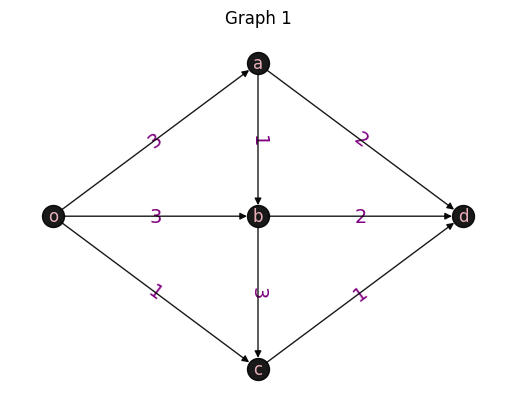

In [274]:
pos = {'o':[0,0], 'a':[1,1], 'b':[1,0], 'c':[1,-1], 'd':[2,0]}
plt.title("Graph 1")
nx.draw_networkx_edge_labels(graph1,pos,edge_labels={('o', 'a'):'3',
('o', 'b'):'3',('a','d'):'2',('b', 'd'):'2',
('b','c'):'3',('a','b'):'1', ('c','d'): '1',('o','c'):1},font_color='purple', font_size=14)

nx.draw(graph1, pos, **options)


In this network initial max flow (WITHOUT extra capacity) from o to d corresponds to 5
Added capacity to edge (a, d). Total added: 1
Added capacity to edge (a, d). Total added: 2
Added capacity to edge (o, a). Total added: 3
Added capacity to edge (a, d). Total added: 4
Added capacity to edge (o, a). Total added: 5
Added capacity to edge (a, d). Total added: 6
Added capacity to edge (o, a). Total added: 7
Added capacity to edge (a, d). Total added: 8
Added capacity to edge (o, a). Total added: 9
Added capacity to edge (a, d). Total added: 10
Added capacity to edge (o, a). Total added: 11
Added capacity to edge (a, d). Total added: 12
Added capacity to edge (o, a). Total added: 13
Added capacity to edge (a, d). Total added: 14
Added capacity to edge (o, a). Total added: 15
Added capacity to edge (a, d). Total added: 16
Added capacity to edge (o, a). Total added: 17
Added capacity to edge (a, d). Total added: 18
Added capacity to edge (o, a). Total added: 19
Added capacity to edge (a, d)

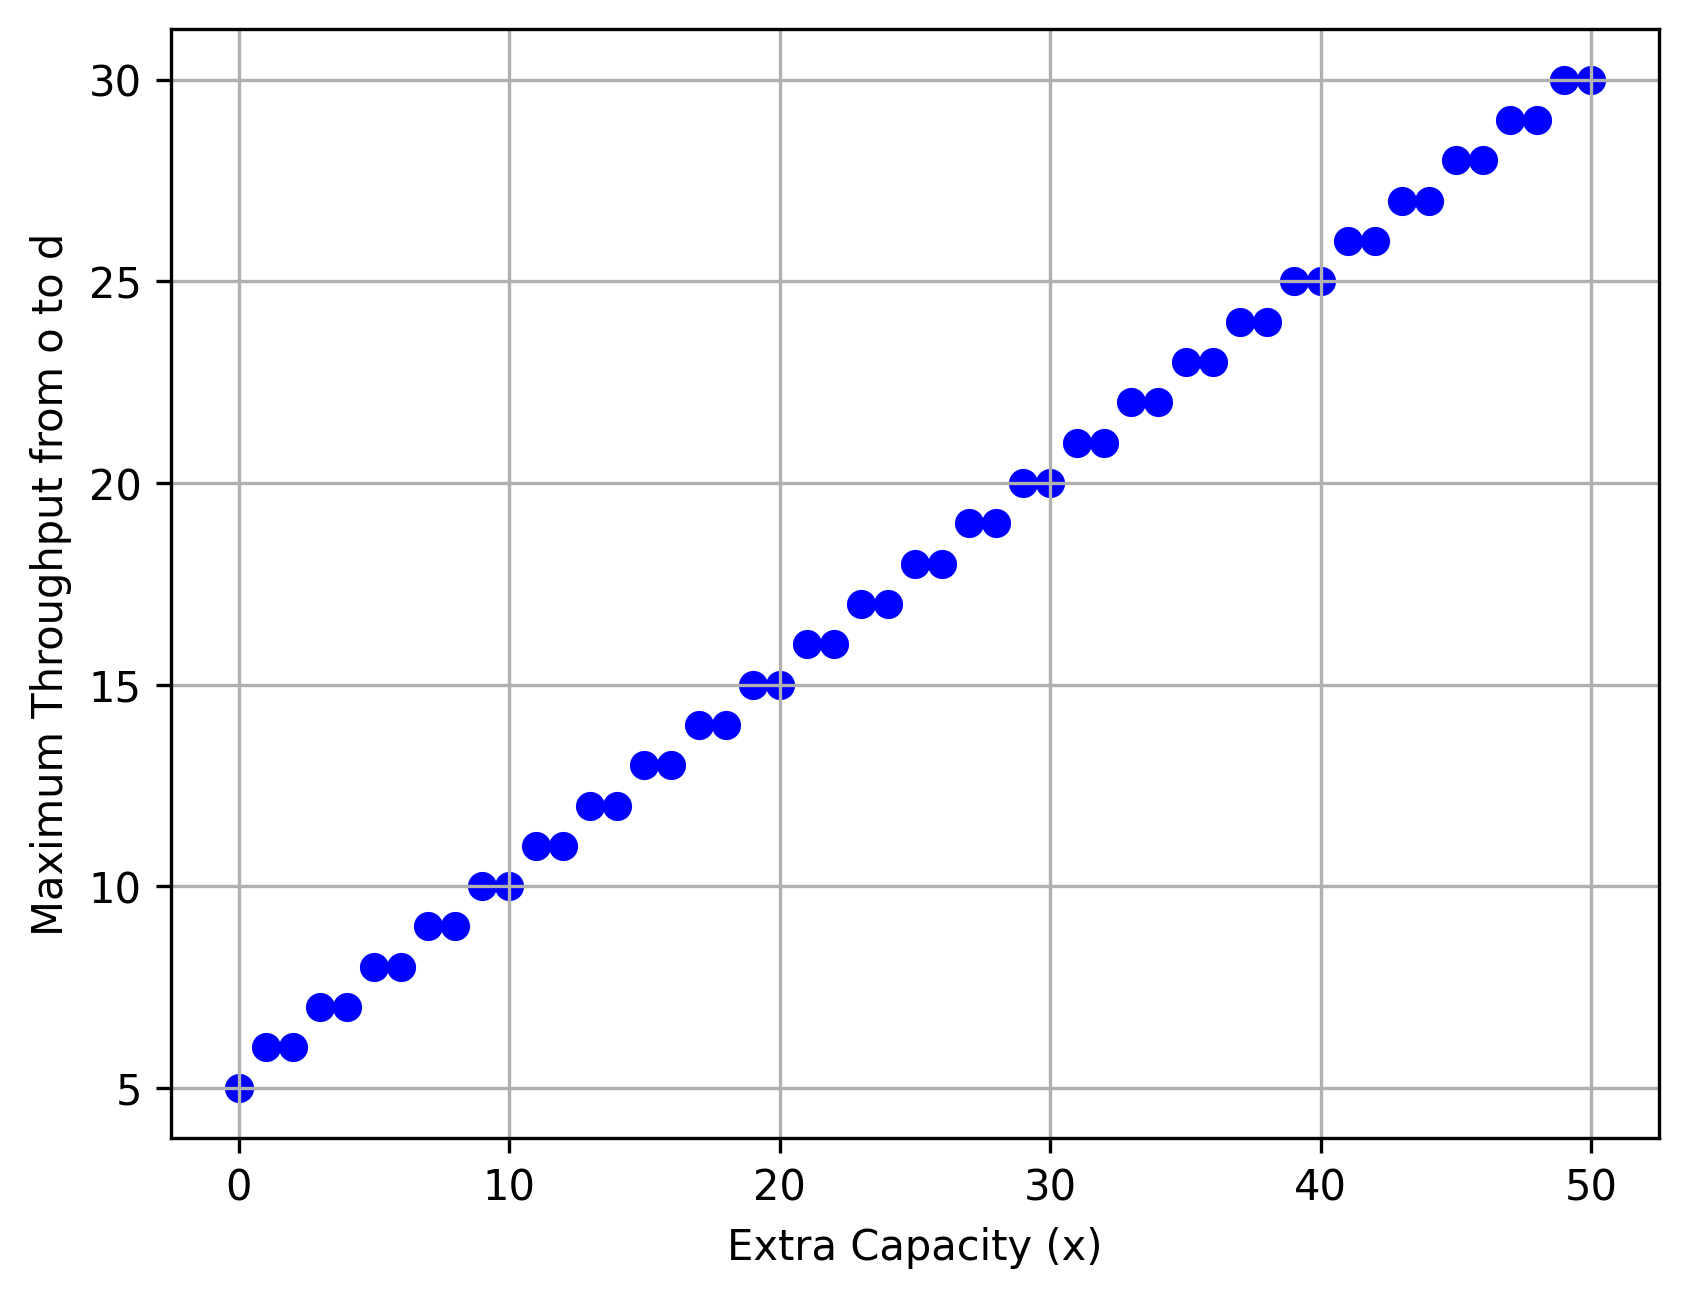

In [275]:
# Function to compute maximum flow
def max_flow(graph):
    return nx.maximum_flow_value(graph, 'o', 'd')

# Computing initial max flow without any extra capacity
initial_max_flow = max_flow(graph1)
print(f"In this network initial max flow (WITHOUT extra capacity) from o to d corresponds to {initial_max_flow}")

def distribute_extra_capacity(graph, extra_capacity):
    graph_copy = graph1.copy()  # Creating a copy of the graph for safety
    total_added_capacity = 0
    throughput_values = [max_flow(graph_copy)]  # Keep track of throughput values

    while total_added_capacity < extra_capacity:
        # Finding edges part of the min-cut
        _, partition = nx.minimum_cut(graph_copy, 'o', 'd')
        cut_1, cut_2 = partition
        min_cut_edges = [(u, v) for u, v in graph_copy.edges() if u in cut_1 and v in cut_2]

        if not min_cut_edges:
            print("No more min-cut edges to increase capacity.")
            break

        # Select one edge (e.g., the first edge) from the min-cut
        u, v = min_cut_edges[0]  # Pick the first edge
        graph_copy[u][v]['capacity'] += 1
        total_added_capacity += 1
        print(f"Added capacity to edge ({u}, {v}). Total added: {total_added_capacity}")

        # Compute and store the new throughput
        throughput_values.append(max_flow(graph_copy))

    return throughput_values

# Compute throughput for adding capacity from 1 to 50 in one go
x_values = range(51)  # Consider adding capacity from 0 to 50
throughput_values = distribute_extra_capacity(graph1, 50)

# Print throughput values
print("Throughput values:", throughput_values)


#print(f' The throughput values are: {throughput_values}')
# Plot the results
plt.figure(dpi=300)
plt.scatter(x_values, throughput_values, marker='o', color='b')
#plt.title('Maximum Throughput as a Function of Extra Capacity')
plt.xlabel('Extra Capacity (x)')
plt.ylabel('Maximum Throughput from o to d')
plt.grid(True)
#plt.savefig("Ex1_b.png")
plt.show()

In [276]:
#Second option: link e8 connect node 'o' directly with node 'd'
graph2 = nx.DiGraph()

In [277]:
edges_list_g2 = [('o', 'a',3), ('a','d',2), ('o', 'b',3),('b', 'd',2),('a','b',1), ('b','c',3),('c','d',1), ('o','d',1)]

In [278]:
for u,v,capacity in edges_list_g2:
    graph2.add_edge(u,v, capacity=capacity)

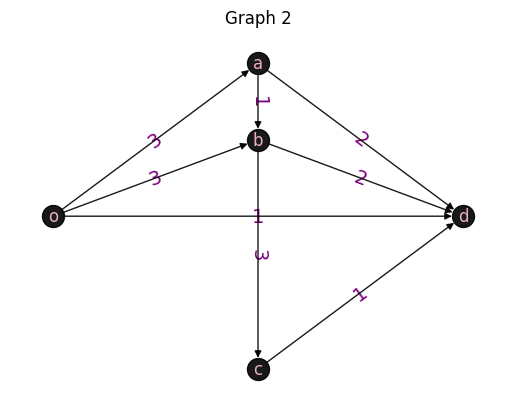

In [279]:
pos = {'o':[0,0], 'a':[1,1], 'b':[1,0.5], 'c':[1,-1], 'd':[2,0]}
plt.title("Graph 2")
nx.draw_networkx_edge_labels(graph2,pos,edge_labels={('o', 'a'):'3',
('o', 'b'):'3',('a','d'):'2',('b', 'd'):'2',
('b','c'):'3',('a','b'):'1', ('c','d'): '1', ('o','d') :1},font_color='purple', font_size=14)

nx.draw(graph2, pos, **options)


In this network initial max flow (WITHOUT extra capacity) from o to d corresponds to 6
Added capacity to edge (o, d). Total added: 1
Added capacity to edge (o, d). Total added: 2
Added capacity to edge (o, d). Total added: 3
Added capacity to edge (o, d). Total added: 4
Added capacity to edge (o, d). Total added: 5
Added capacity to edge (o, d). Total added: 6
Added capacity to edge (o, d). Total added: 7
Added capacity to edge (o, d). Total added: 8
Added capacity to edge (o, d). Total added: 9
Added capacity to edge (o, d). Total added: 10
Added capacity to edge (o, d). Total added: 11
Added capacity to edge (o, d). Total added: 12
Added capacity to edge (o, d). Total added: 13
Added capacity to edge (o, d). Total added: 14
Added capacity to edge (o, d). Total added: 15
Added capacity to edge (o, d). Total added: 16
Added capacity to edge (o, d). Total added: 17
Added capacity to edge (o, d). Total added: 18
Added capacity to edge (o, d). Total added: 19
Added capacity to edge (o, d)

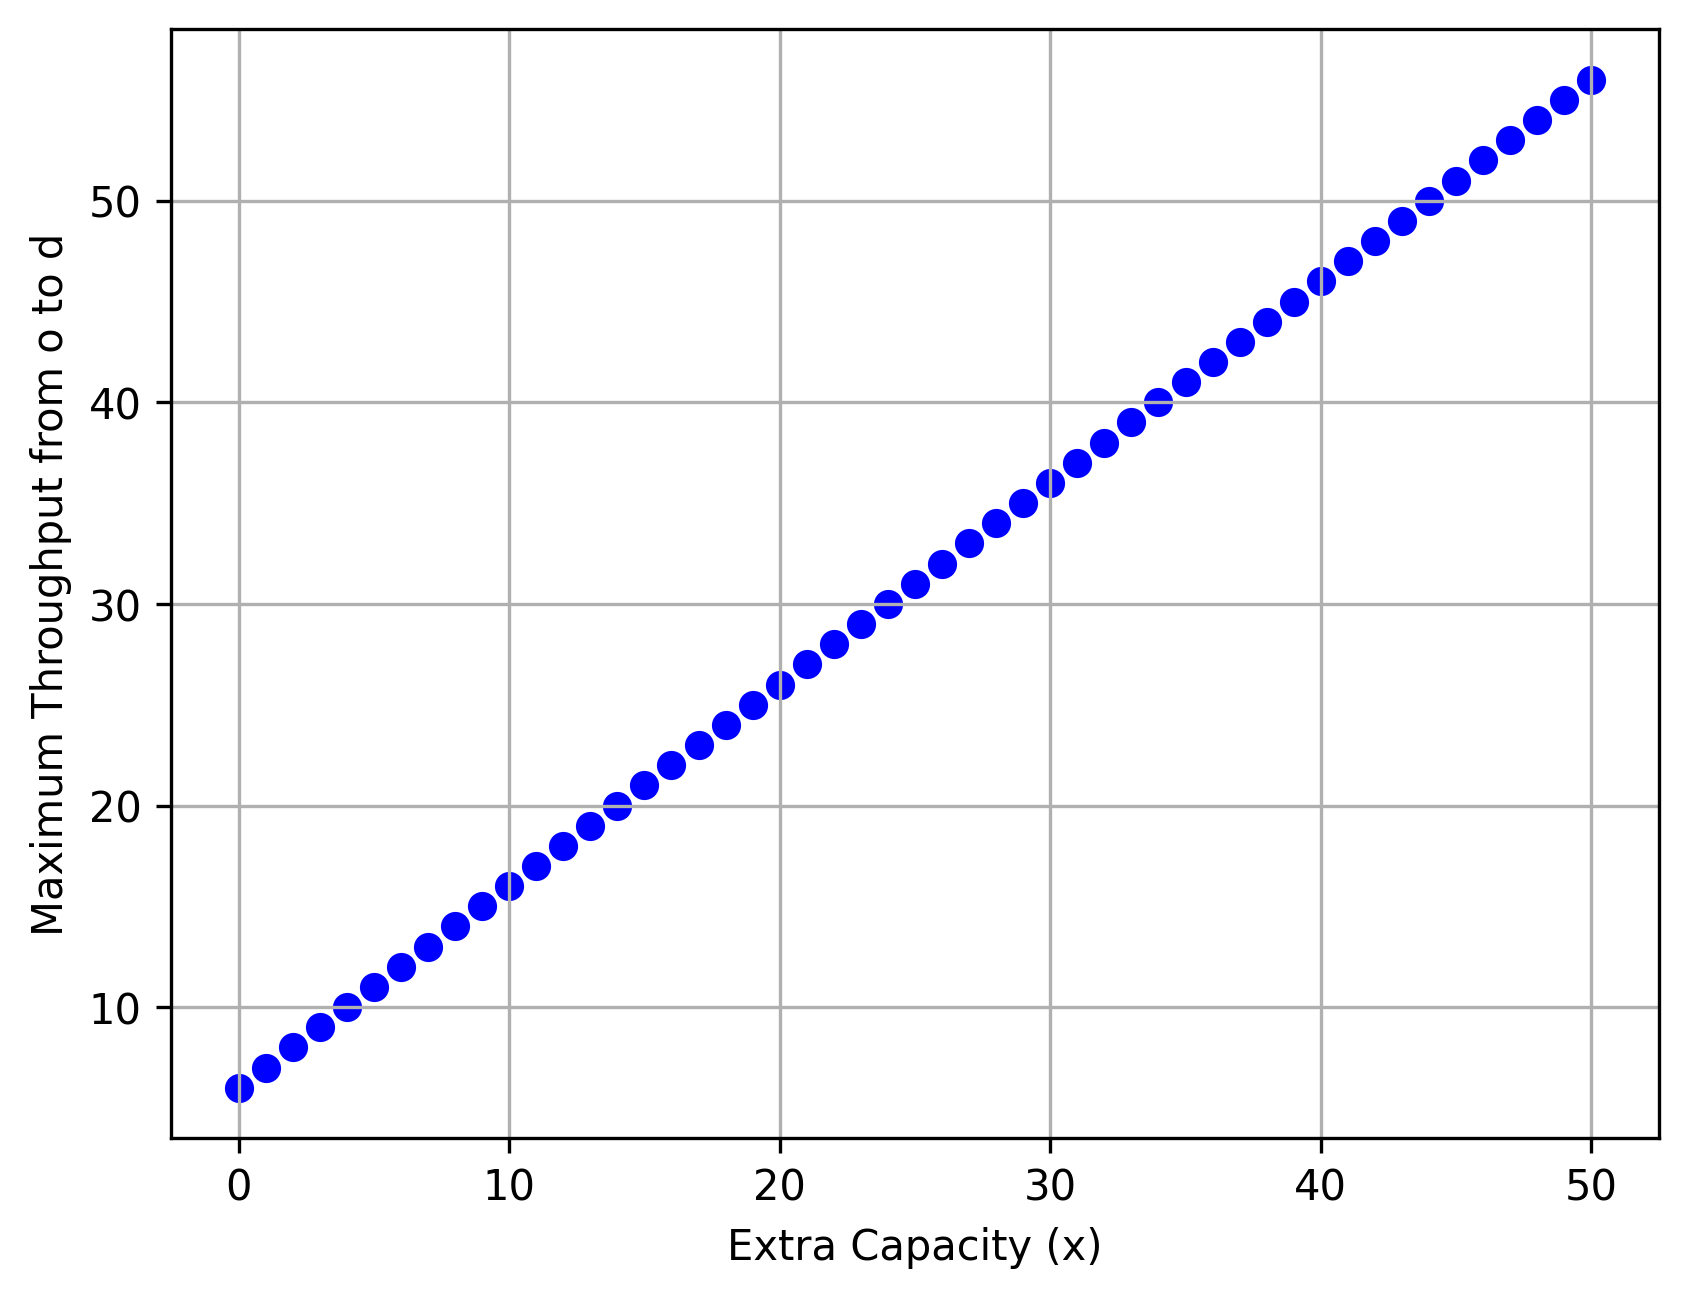

In [280]:
# Function to compute maximum flow
def max_flow(graph):
    return nx.maximum_flow_value(graph, 'o', 'd')

# Computing initial max flow without any extra capacity
initial_max_flow = max_flow(graph2)
print(f"In this network initial max flow (WITHOUT extra capacity) from o to d corresponds to {initial_max_flow}")

def distribute_extra_capacity(graph, extra_capacity):
    graph_copy = graph2.copy()  # Creating a copy of the graph for safety
    total_added_capacity = 0
    throughput_values = [max_flow(graph_copy)]  # Keep track of throughput values

    while total_added_capacity < extra_capacity:
        # Finding edges part of the min-cut
        _, partition = nx.minimum_cut(graph_copy, 'o', 'd')
        cut_1, cut_2 = partition
        min_cut_edges = [(u, v) for u, v in graph_copy.edges() if u in cut_1 and v in cut_2]

        if not min_cut_edges:
            print("No more min-cut edges to increase capacity.")
            break

        # Select one edge (e.g., the first edge) from the min-cut
        u, v = min_cut_edges[0]  # Pick the first edge
        graph_copy[u][v]['capacity'] += 1
        total_added_capacity += 1
        print(f"Added capacity to edge ({u}, {v}). Total added: {total_added_capacity}")

        # Compute and store the new throughput
        throughput_values.append(max_flow(graph_copy))

    return throughput_values

# Compute throughput for adding capacity from 1 to 50 in one go
x_values = range(51)  # Consider adding capacity from 0 to 50
throughput_values = distribute_extra_capacity(graph2, 50)

# Print throughput values
print("Throughput values:", throughput_values)


#print(f' The throughput values are: {throughput_values}')
# Plot the results
plt.figure(dpi=300)
plt.scatter(x_values, throughput_values, marker='o', color='b')
#plt.title('Maximum Throughput as a Function of Extra Capacity')
plt.xlabel('Extra Capacity (x)')
plt.ylabel('Maximum Throughput from o to d')
plt.grid(True)
#plt.savefig("Ex1_b.png")
plt.show()

### <center> Problem 2 </center>

<span style="color: red;"> There are a set of people {a1, a2, a3, a4} and a set of foods {b1, b2, b3, b4} . Each person is interested in a subset of foods, specifically:
- a1:  b1, b2
- a2:  b2, b3
- a3:  b1, b4
- a4:  b1, b2, b4
  </span>

In [281]:
graph2 = nx.DiGraph()

In [282]:
edges_list_g2 = [('a1', 'b1'), ('a1','b2'), ('a2', 'b2'), ('a2', 'b3'), ('a3','b1'), ('a3','b4'), ('a4','b1'), ('a4','b2'), ('a4','b4')]

In [283]:
graph2.add_edges_from(edges_list_g2)

In [284]:
pos2 = {'a1': [0,0], 'a2': [0,1], 'a3': [0,2], 'a4': [0,3], 'b1': [1,0], 'b2': [1,1], 'b3': [1,2], 'b4': [2,2]}

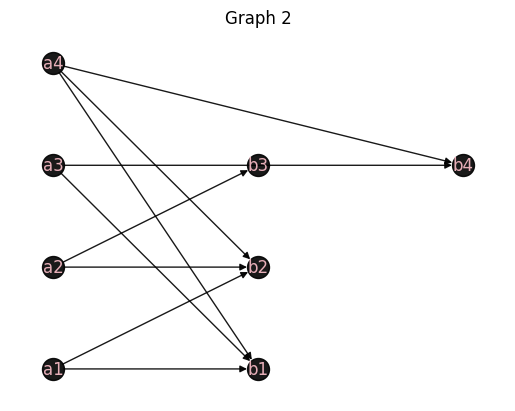

In [285]:
plt.title("Graph 2")
nx.draw(graph2, pos2, **options)

<span style="color: red;"> (a) Exploit max- flow problems to find a perfect matching (if any). </span>

To solve this we can exploit the max-flow min-cut theorem, which, as has been discussed in the lectures can also be linked to Hall's Theorem (for perfect matching). Thus, the above graph needs to be adjusted by adding to it an origin and a destination node, as it can be observed below.


In [286]:
graph2.add_edges_from([('o', 'a1'), ('o', 'a2'), ('o', 'a3'), ('o', 'a4'),  ('b1', 'd'), ('b2', 'd'), ('b3', 'd'), ('b4', 'd')])

In [287]:
pos3 = {'o': [0,2],'a1': [1,0], 'a2': [1,1], 'a3': [1,2], 'a4': [1,3], 'b1': [2,0], 'b2': [2,1], 'b3': [2,2], 'b4': [2,3], 'd': [3,2]}

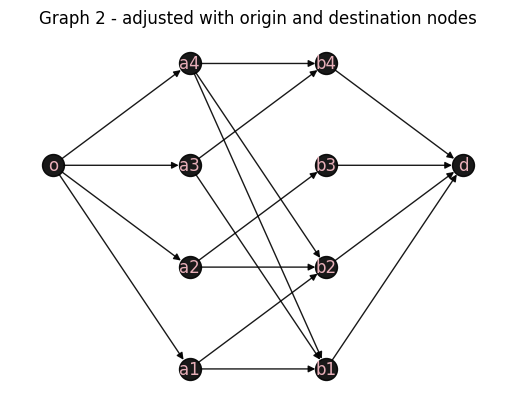

In [288]:
plt.title("Graph 2 - adjusted with origin and destination nodes")
nx.draw(graph2, pos3, **options)

In [289]:
for n1,n2 in graph2.edges:
    graph2[n1][n2]['capacity'] = 1

In [290]:
nx.algorithms.flow.maximum_flow(graph2, 'o', 'd')

(4,
 {'a1': {'b1': 0, 'b2': 1},
  'b1': {'d': 1},
  'b2': {'d': 1},
  'a2': {'b2': 0, 'b3': 1},
  'b3': {'d': 1},
  'a3': {'b1': 1, 'b4': 0},
  'b4': {'d': 1},
  'a4': {'b1': 0, 'b2': 0, 'b4': 1},
  'o': {'a1': 1, 'a2': 1, 'a3': 1, 'a4': 1},
  'd': {}})

**As it can be observed above in the output of the method, there does in fact exist a perfect matching:**
- Person 1 (a1) - Food 2 (b2)
- Person 2 (a2) - Food 3 (b3)
- Person 3 (a3) - Food 1 (b1)
- Person 4 (a4) - Food 4 (b4)

In [291]:
perf_matching = {'a1': 'b2', 'a2': 'b3', 'a3': 'b1', 'a4': 'b4'}

In [292]:
test_graph = nx.DiGraph()

In [293]:
edges_list_g2_test = [('a1', 'b1'), ('a1','b2'), ('a2', 'b2'), ('a2', 'b3'), ('a3','b1'), ('a3','b4'), ('a4','b1'), ('a4','b2'), ('a4','b4')]

In [294]:
test_graph.add_edges_from(edges_list_g2_test)

In [295]:
nx.is_perfect_matching(test_graph, perf_matching)

True

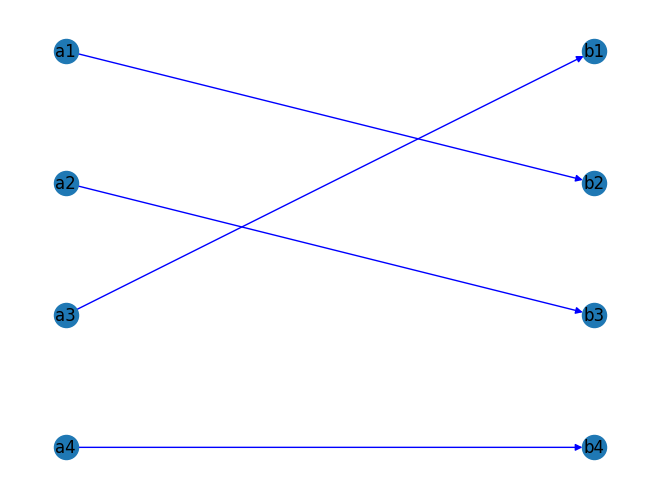

In [296]:
# Draw the perfect matching

perfect_matching_graph = nx.DiGraph()
perfect_matching_graph.add_edges_from([('a1', 'b2'),('a2', 'b3'),( 'a3', 'b1'),( 'a4', 'b4')])

perfect_matching_positions = {'a1':[0,2], 'a2':[0,1], 'a3':[0,0], 'a4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1]}

nx.draw(perfect_matching_graph,perfect_matching_positions, with_labels=True, edge_color = 'blue')

<span style="color: red;"> (b) Now, assume that there are multiple portions of every food, and the distribution of the
 portions is (2,3,2,2). Each person can take an arbitrary number of different foods. Exploit
 the analogy with max-flow problems to establish how many portions of food can be assigned
 in total. </span>

In [297]:
#re-assigned an arbitrary large number for the flow
graph2['o']['a1']['capacity'] = 100
graph2['o']['a2']['capacity'] = 100
graph2['o']['a3']['capacity'] = 100
graph2['o']['a4']['capacity'] = 100

#re-assigned the flow as required in the distribution provided
graph2['b1']['d']['capacity'] = 2
graph2['b2']['d']['capacity'] = 3
graph2['b3']['d']['capacity'] = 2
graph2['b4']['d']['capacity'] = 2

In [298]:
for u, v, data in graph2.edges(data=True):
    print(f"Edge {u} -> {v} has capacity {data['capacity']}")

Edge a1 -> b1 has capacity 1
Edge a1 -> b2 has capacity 1
Edge b1 -> d has capacity 2
Edge b2 -> d has capacity 3
Edge a2 -> b2 has capacity 1
Edge a2 -> b3 has capacity 1
Edge b3 -> d has capacity 2
Edge a3 -> b1 has capacity 1
Edge a3 -> b4 has capacity 1
Edge b4 -> d has capacity 2
Edge a4 -> b1 has capacity 1
Edge a4 -> b2 has capacity 1
Edge a4 -> b4 has capacity 1
Edge o -> a1 has capacity 100
Edge o -> a2 has capacity 100
Edge o -> a3 has capacity 100
Edge o -> a4 has capacity 100


In [299]:
nx.algorithms.flow.maximum_flow(graph2,'o','d')

(8,
 {'a1': {'b1': 0, 'b2': 1},
  'b1': {'d': 2},
  'b2': {'d': 3},
  'a2': {'b2': 1, 'b3': 1},
  'b3': {'d': 1},
  'a3': {'b1': 1, 'b4': 1},
  'b4': {'d': 2},
  'a4': {'b1': 1, 'b2': 1, 'b4': 1},
  'o': {'a1': 1, 'a2': 2, 'a3': 2, 'a4': 3},
  'd': {}})

As we can observe above, the new max-flow is 8 and the assignment of portions is the following:
- Person a1 gets 1 portion of food (b2)
- Person a2 gets 1 portion of food (b2) and 1 portion of food (b3)
- Person a3 gets 1 portion of food (b1) and 1 portion of food (b4)
- Person a4 gets 1 portion of food (b1), 1 portion of food (b2) and 1 portion of food (b4)

As we can observe the only not allocated portion of food is 1 from b3.


 <span style="color: red;"> (c) Now, assume that a1 wants 3 portions of food, a-i (for every i= 1) want 2 portions of food, every person can take multiple portions of the same food, and the distribution of the portions is (2,3,2,2). Exploit the analogy with max- flow problems to establish how many portions of food can be assigned in total. </span>

In [300]:
#re-assigned the capacities as determined
graph2['o']['a1']['capacity'] = 3
graph2['o']['a2']['capacity'] = 2
graph2['o']['a3']['capacity'] = 2
graph2['o']['a4']['capacity'] = 2

graph2['a1']['b1']['capacity'] = 300
graph2['a1']['b2']['capacity'] = 300
graph2['a2']['b2']['capacity'] = 300
graph2['a2']['b3']['capacity'] = 300
graph2['a3']['b1']['capacity'] = 300
graph2['a3']['b4']['capacity'] = 300
graph2['a4']['b1']['capacity'] = 300
graph2['a4']['b2']['capacity'] = 300
graph2['a4']['b4']['capacity'] = 300


graph2['b1']['d']['capacity'] = 2
graph2['b2']['d']['capacity'] = 3
graph2['b3']['d']['capacity'] = 2
graph2['b4']['d']['capacity'] = 2

In [301]:
for u, v, data in graph2.edges(data=True):
    print(f"Edge {u} -> {v} has capacity {data['capacity']}")

Edge a1 -> b1 has capacity 300
Edge a1 -> b2 has capacity 300
Edge b1 -> d has capacity 2
Edge b2 -> d has capacity 3
Edge a2 -> b2 has capacity 300
Edge a2 -> b3 has capacity 300
Edge b3 -> d has capacity 2
Edge a3 -> b1 has capacity 300
Edge a3 -> b4 has capacity 300
Edge b4 -> d has capacity 2
Edge a4 -> b1 has capacity 300
Edge a4 -> b2 has capacity 300
Edge a4 -> b4 has capacity 300
Edge o -> a1 has capacity 3
Edge o -> a2 has capacity 2
Edge o -> a3 has capacity 2
Edge o -> a4 has capacity 2


In [302]:
nx.algorithms.flow.maximum_flow(graph2,'o','d')

(9,
 {'a1': {'b1': 0, 'b2': 3},
  'b1': {'d': 2},
  'b2': {'d': 3},
  'a2': {'b2': 0, 'b3': 2},
  'b3': {'d': 2},
  'a3': {'b1': 2, 'b4': 0},
  'b4': {'d': 2},
  'a4': {'b1': 0, 'b2': 0, 'b4': 2},
  'o': {'a1': 3, 'a2': 2, 'a3': 2, 'a4': 2},
  'd': {}})

In this case, we set the capacity of the intermediate links as 300 given the fact that each person can take multiple portions. so we take an arbitrary large number, such that it is larger than at least the largest portion available. As we can observe above, the new throughput is 9 and the distribution of the portions of foods in accordance with the constrains will be the following:

- Person a1 takes 3 portions of food b2.
- Person a2 takes 2 portions of food b3.
- Person a3 takes 2 portions of food b1.
- Person a4 takes 2 portions of food b4.

Hence, we observe an optimal allocation of all the 9 portions available.

### <center> Problem 3 </center>

We are given the highway network in Los Angeles, see Figure 2. To simplify the
problem, an approximate highway map is given in Figure 3, covering part of the real highway
network. The node-link incidence matrix B, for this traffic network is given in the file traffic.mat.
The rows of B are associated with the nodes of the network and the columns of B with the links.
The i-th column of B has 1 in the row corresponding to the tail node of link ei and (−1) in the row
corresponding to the head node of link ei
. Each node represents an intersection between highways
(and some of the area around).
Each link ei ∈ {e1, . . . , e28}, has a maximum flow capacity cei
. The capacities are given as
a vector ce in the file capacities.mat. Furthermore, each link has a minimum travelling time lei
,
which the drivers experience when the road is empty. In the same manner as for the capacities,
the minimum travelling times are given as a vector le in the file traveltime.mat. These values are simply retrieved by dividing the length of the highway segment with the assumed speed limit 60
miles/hour. For each link, we introduce the delay function
τe(fe) = le
1 − fe/ce
, 0 ≤ fe < ce.
For fe ≥ ce, the value of τe(fe) is considered as +∞.

In [5]:
# Uploading files about flow, capacities, traffic and travel time

flow = scipy.io.loadmat('flow.mat')["flow"].reshape(28,)
capacities = scipy.io.loadmat('capacities.mat')["capacities"].reshape(28,)
B = scipy.io.loadmat('traffic.mat')["traffic"]
length = scipy.io.loadmat('traveltime.mat')["traveltime"].reshape(28,)

# Building up Los Angel Highway Network model

highway_network = nx.DiGraph()

highway_network.add_nodes_from(list(range(1, 18)))


highway_network.add_edges_from([
(1, 2, {'weight': length[0], 'capacity': capacities[0]}),
(2, 3, {'weight': length[1], 'capacity': capacities[1]}),
(3, 4, {'weight': length[2], 'capacity': capacities[2]}),
(4, 5, {'weight': length[3], 'capacity': capacities[3]}),
(1, 6, {'weight': length[4], 'capacity': capacities[4]}),
(6, 7, {'weight': length[5], 'capacity': capacities[5]}),
(7, 8, {'weight': length[6], 'capacity': capacities[6]}),
(8, 9, {'weight': length[7], 'capacity': capacities[7]}),
(9, 13, {'weight': length[8], 'capacity': capacities[8]}),
(2, 7, {'weight': length[9], 'capacity': capacities[9]}),
(3, 8, {'weight': length[10], 'capacity': capacities[10]}),
(3, 9, {'weight': length[11], 'capacity': capacities[11]}),
(4, 9, {'weight': length[12], 'capacity': capacities[12]}),
(5, 14, {'weight': length[13], 'capacity': capacities[13]}),
(6, 10, {'weight': length[14], 'capacity': capacities[14]}),
(10, 11, {'weight': length[15], 'capacity': capacities[15]}),
(10, 15, {'weight': length[16], 'capacity': capacities[16]}),
(7, 10, {'weight': length[17], 'capacity': capacities[17]}),
(8, 11, {'weight': length[18], 'capacity': capacities[18]}),
(9, 12, {'weight': length[19], 'capacity': capacities[19]}),
(11, 12, {'weight': length[20], 'capacity': capacities[20]}),
(12, 13, {'weight': length[21], 'capacity': capacities[21]}),
(13, 14, {'weight': length[22], 'capacity': capacities[22]}),
(11, 15, {'weight': length[23], 'capacity': capacities[23]}),
(13, 17, {'weight': length[25], 'capacity': capacities[25]}),
(14, 17, {'weight': length[25], 'capacity': capacities[25]}),
(15, 16, {'weight': length[26], 'capacity': capacities[26]}),
(16, 17, {'weight': length[27], 'capacity': capacities[27]}),
])

positions = {1:[0,12], 2:[4,12], 3:[6,12], 4:[10,12], 5:[14,11], 6:[1,8], 7:[4,8], 8:[6,8], 9:[8,9], 10:[4,4], 11:[6,4],
12:[8,4], 13:[12,3], 14:[14,3], 15:[6,2], 16:[9,1], 17:[14,0]}

nx.draw(highway_network, positions, with_labels=True)

FileNotFoundError: [Errno 2] No such file or directory: 'flow.mat'

In [304]:
capacities

array([ 8741,  9864, 13350, 10926, 13707,  6960,  7422,  6678,  6297,
       11102,  8899,  8970,  9753,  9719,  9083,  7416, 13353, 11216,
       10947, 10019,  8732, 10763,  6677,  9403, 10355,  9067, 11990,
        8258], dtype=uint16)

# A
Find the shortest path between node 1 and 17. This is equivalent to the fastest path (path
with shortest traveling time) in an empty network.

In [305]:
nx.shortest_path(highway_network, source=1, target=17, weight='weight')

[1, 2, 3, 9, 13, 17]

Shortest path through our network is: 1 ➡ 2 ➡ 3 ➡ 9 ➡ 13 ➡ 17

# B
Find the maximum flow between node 1 and 17.


In [306]:
nx.algorithms.flow.maximum_flow(highway_network, 1, 17)

(22448,
 {1: {2: 8741, 6: 13707},
  2: {3: 8741, 7: 0},
  3: {4: 0, 8: 0, 9: 8741},
  4: {5: 0, 9: 0},
  5: {14: 0},
  6: {7: 4624, 10: 9083},
  7: {8: 4624, 10: 0},
  8: {9: 4624, 11: 0},
  9: {13: 6297, 12: 7068},
  10: {11: 825, 15: 8258},
  11: {12: 825, 15: 0},
  12: {13: 7893},
  13: {14: 5123, 17: 9067},
  14: {17: 5123},
  15: {16: 8258},
  16: {17: 8258},
  17: {}})

Our maximum flow from origin node 1 to destination node 17 has a numerical value of 22448.

# C
Given the flow vector in flow.mat, compute the vector ν satisfying Bf = ν.

In [307]:
print(flow)
ν = B.dot(flow) # ν, the external inflow, corresponds to the matrix multiplication between the flow vector(flow.mat) and the node-link incidence matrix (B)
print(ν)

[ 7000  6537 11139  9282  9282  6398  6728  5988  5951  9557  7423  7423
  6814  8536  7652  6537 11924  9640  8161  8603  7974  9446  5562  6719
  9455  6686 10833  7403]
[ 16282   9094  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


In the following, we assume that the exogenous inflow is zero in all the nodes except for node 1,
for which ν1 has the same value computed in the point (c), and node 17, for which ν17 = −ν1.


# D
Find the social optimum f
∗ with respect to the delays on the different links τe(fe).

Minimize the following cost function:

$$ \sum_{e \in \varepsilon } f_{e}\tau_{e}(f_{e}) = \sum_{e \in \varepsilon }  \frac{f_{e}l_{e}} {1 - \frac{f_{e}} {C_{e}} } = \sum_{e \in \varepsilon } \left( \frac{l_{e}C_{e}} {1 - \frac{f_{e}} {C_{e}} } - l_{e}C_{e} \right)$$

In [308]:

exogenous_inflow = np.zeros(17) #Exogenous inflow matrix from vector ν
exogenous_inflow[1-1] = ν[1-1]
exogenous_inflow[17-1] = -ν[1-1]

print(exogenous_inflow)

f = cp.Variable(28)
cost_func = cp.multiply(cp.multiply(length, capacities), cp.inv_pos(1 - f / capacities)) - cp.multiply(length, capacities) #Cost function implementation
objective = cp.Minimize(sum(cost_func)) #We want to minimize that cost function

constraints = [B @ f == exogenous_inflow, f >=0, f <= capacities] #Flow constraints definition
prob = cp.Problem(objective, constraints) #Problem characterization
cost_opt = prob.solve()

flow_star1 = f.value
print(flow_star1)
print("This networks has a social optimum cost corresponding to:", cost_opt)

[ 16282.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0. -16282.]
[6.37432251e+03 5.66549529e+03 2.90463538e+03 2.90463517e+03
 9.90767749e+03 4.52797714e+03 2.95047550e+03 2.48733369e+03
 3.01828312e+03 7.08827224e+02 5.80546601e-04 2.76085932e+03
 2.14768659e-04 2.90463517e+03 5.37970035e+03 2.76618466e+03
 4.89984456e+03 2.28632887e+03 4.63142391e+02 2.22991010e+03
 3.22932675e+03 5.45923685e+03 2.30739710e+03 2.96691561e-04
 6.17012287e+03 5.21203227e+03 4.89984486e+03 4.89984486e+03]
This networks has a social optimum cost corresponding to: 23997.160214062365


# E
Find the Wardrop equilibrium f
(0).
Cost function:
$${\sum_{e \in \varepsilon } \int^{f{e}}_{0} \tau_{e}(s) ds}$$

In [309]:
f = cp.Variable(28)

obj = cp.Minimize(sum(-cp.multiply(cp.multiply(capacities, length), cp.log(1-(f/capacities))))) #Solution of the integral contained in the cost function
constraints = [B @ f == exogenous_inflow, f >= 0, f <= capacities] #Flow constraints definition
prob = cp.Problem(obj, constraints)
cost = prob.solve()
wardrop_flow = f.value
print("This newtork has the following Wardrop equilibrium flow:", f.value)

delay = (length / (1 - (f.value/capacities)))
wardrop_cost = np.sum(f.value*delay)
print(f"This network has a Wardrop equlibrium cost corresponding to: {wardrop_cost}")

This newtork has the following Wardrop equilibrium flow: [6.34959633e+03 6.17822791e+03 2.03775017e+03 2.03775017e+03
 9.93240367e+03 4.56731599e+03 2.73811880e+03 2.14413932e+03
 3.27078102e+03 1.71368416e+02 6.92081045e+01 4.07126964e+03
 1.58011966e-06 2.03775017e+03 5.36508768e+03 2.20295335e+03
 5.16269994e+03 2.00056560e+03 6.63187589e+02 2.94462793e+03
 2.86614093e+03 5.81076886e+03 2.43669323e+03 2.46061404e-06
 6.64485666e+03 4.47444340e+03 5.16269994e+03 5.16269994e+03]
This network has a Wardrop equlibrium cost corresponding to: 24341.24549203723


# F
Introduce tolls, such that the toll on link e is ωe = ψ
0
e
(f
∗
e
)−τe(f
∗
e
). For the considered ψe(fe),
ωe = f
∗
e
τ
0
e
(f
∗
e
), where f
∗
e
is the flow at the system optimum. Now the delay on link e is given
by τe(fe) + ωe. compute the new Wardrop equilibrium f
(ω)
. What do you observe?

Here we have to find the new Wardrop equilibrium, considering also the addition of tolls, that results in a modified cost function.

In [310]:
omega = capacities * length * flow_star1 *1/(capacities - flow_star1)**2 #Implementation of tolls (omega)

f = cp.Variable(28)
objective = cp.Minimize(sum(-cp.multiply(cp.multiply(capacities, length), cp.log(1 - f/capacities))+ cp.multiply(omega, f)))  #Solution of the integral contained in the cost function + addition of tolls
constraints = [B @ f == exogenous_inflow, f >= 0, f <= capacities] #Flow constraints definition
prob_tolls = cp.Problem(objective, constraints) #Problem(with tolls) definition
wcostopt = prob_tolls.solve()
wardroptolls_flow = f.value

print("This newtork has the following Wardrop equilibrium flow:", wardroptolls_flow)
print(f"WITHOUT TOLLS this network has a Wardrop equlibrium cost corresponding to: {wardrop_cost}")
#now i define the social optimum cost function with the wardrop eq. flow
print(f"WITH TOLLS this network has a Wardrop equlibrium cost corresponding to: {wardroptolls_flow @ (length/(1-(wardroptolls_flow/capacities)))}")

This newtork has the following Wardrop equilibrium flow: [6.37471349e+03 5.66549685e+03 2.90470664e+03 2.90470664e+03
 9.90728650e+03 4.52752282e+03 2.95045225e+03 2.48721213e+03
 3.01816249e+03 7.09216642e+02 1.06940865e-05 2.76079020e+03
 3.12151352e-06 2.90470664e+03 5.37976368e+03 2.76615455e+03
 4.89989634e+03 2.28628721e+03 4.63240132e+02 2.22983985e+03
 3.22939468e+03 5.45923452e+03 2.30733617e+03 4.57777167e-06
 6.17006084e+03 5.21204281e+03 4.89989635e+03 4.89989635e+03]
WITHOUT TOLLS this network has a Wardrop equlibrium cost corresponding to: 24341.24549203723
WITH TOLLS this network has a Wardrop equlibrium cost corresponding to: 23997.16033886616


# G
Instead of the total travel time, let the cost for the system be the total additional travel time
compared to the total travel time in free flow, given by:
 $${\displaystyle \psi_{e}(f_{e}) = f_{e}(\tau_{e}(f_{e}) − l_{e})}$$
Compute the system optimum f
∗
for the costs above. Construct a toll vector ω
∗
such that the Wardrop equilibrium f
(ω
∗
)
coincides with f
∗
. Compute
the new Wardrop equilibrium with the constructed tolls f
(ω
∗
)
to verify your result.

In [311]:
f = cp.Variable(28)
new_cost_func = sum((cp.multiply(cp.multiply(length, capacities), cp.inv_pos(1 - f / capacities)) - cp.multiply(length, capacities) - cp.multiply(f, length))) #New cost function implementation
objective = cp.Minimize(new_cost_func) #We want to minimize this new cost function (same objective of before)
constraints = [B @ f == exogenous_inflow, f >=0, f <= capacities] #Flow constraints definition
prob_new_cost_func = cp.Problem(objective, constraints) #Problem (with new cost function) definition
cost_opt_tolls = prob_new_cost_func.solve()
social_opt_new_flow = f.value
print("Now, with this new cost function, this network has a social optimum cost of:", ( social_opt_new_flow @ ((length/(1-(social_opt_new_flow/capacities))) - length)))

new_omega = capacities * length * social_opt_new_flow * 1/(capacities - social_opt_new_flow)**2 #Implementation of "new" tolls(new_omega)

f = cp.Variable(28)
wardrop_new_cost_function = sum(-cp.multiply(cp.multiply(length, capacities), cp.log(1 - (f/capacities))) - cp.multiply(f, length) + cp.multiply(new_omega, f)) #New cost function implementation
objective = cp.Minimize(wardrop_new_cost_function) #We want to minimize this new cost function (same objective of before)
constraints = [B @ f == exogenous_inflow, f >= 0, f <= capacities] #Flow constraints definition
prob = cp.Problem(objective, constraints)
cost_opt = prob.solve()
new_wardroptolls_flow = f.value
print("Now, with this new cost function, this newtork has the following Wardrop equilibrium flow:",new_wardroptolls_flow)
print(f"Now, with this new cost function, and also WITH TOLLS, this network has a Wardrop equlibrium cost corresponding to: {new_wardroptolls_flow @ (((length/(1-(social_opt_new_flow/capacities))) - length))}")

Now, with this new cost function, this network has a social optimum cost of: 13550.21558388883
Now, with this new cost function, this newtork has the following Wardrop equilibrium flow: [6.39375458e+03 5.42068165e+03 3.24354836e+03 3.24354835e+03
 9.88824542e+03 4.53054071e+03 3.05155747e+03 2.61214520e+03
 2.89543940e+03 9.73072925e+02 9.26203767e-06 2.17713328e+03
 9.85607847e-06 3.24354835e+03 5.35770472e+03 2.96981689e+03
 4.83994398e+03 2.45205616e+03 4.39412284e+02 1.89383909e+03
 3.40922917e+03 5.30306826e+03 2.14015712e+03 5.26710978e-06
 6.05835054e+03 5.38370547e+03 4.83994399e+03 4.83994399e+03]
Now, with this new cost function, and also WITH TOLLS, this network has a Wardrop equlibrium cost corresponding to: 13550.218470998525
